In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("datos/encoding.csv", index_col=0)

In [4]:
df.head()

,postalCode,price,powerCV_robust,kilometer_robust,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,70435,480.0,-0.374913,0.0,5919.340419,5919.324221,5950.394844,5182.351533,2204.474969,4746.972781,4472.671667,5038.059231,5273.200085,3397.321601
1,66954,18300.0,1.128683,-1.0,5903.443396,5903.511051,5926.562881,12127.563144,7239.785288,4734.577120,6037.628327,8537.138905,8828.247228,2303.964735
2,90480,9800.0,0.746735,-1.0,5903.443396,5903.511051,5926.562881,13305.266694,7239.785288,10585.224181,6050.044119,8537.138905,12561.257062,3374.390103
3,91074,1500.0,-0.531319,0.0,5903.443396,5903.511051,5926.562881,2777.701282,7239.785288,4734.577120,6198.748774,5011.562951,5271.489409,7092.000540
4,60437,3600.0,-0.619461,-2.4,5916.765237,5916.724803,5958.128460,2778.258257,7246.674406,4756.336114,6710.554236,8521.338650,6409.241600,7117.079385


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   postalCode           371528 non-null  int64  
 1   price                371528 non-null  float64
 2   powerCV_robust       371528 non-null  float64
 3   kilometer_robust     371528 non-null  float64
 4   seller               371528 non-null  float64
 5   offerType            371528 non-null  float64
 6   abtest               371528 non-null  float64
 7   vehicleType          371528 non-null  float64
 8   yearOfRegistration   371528 non-null  float64
 9   gearbox              371528 non-null  float64
 10  monthOfRegistration  371528 non-null  float64
 11  fuelType             371528 non-null  float64
 12  brand                371528 non-null  float64
 13  notRepairedDamage    371528 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 42.5 MB


En la variable X guardamos las variables independientes, que serán las del Dataframe qeu hemos cargado quitandole la columna "price" que es la variable dependiente que vamos a predecir con el modelo.

In [6]:
X=df.drop(["price"], axis = 1)
y=df[["price"]]

Hacemos el train test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(X_train)
y_train_pred[:3]

array([[ 6164.16605484],
       [17631.76211459],
       [ 7337.37421962]])

In [9]:
y_test_pred = modelo_lineal.predict(X_test)
y_test_pred[:3]

array([[ 6298.51284926],
       [ 2832.78038224],
       [-1764.16841189]])

In [10]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [11]:
pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.291759,3388.629892,1.033683e+08,10167.020208
test,0.307367,3398.433385,9.953051e+07,9976.497826


El R^2 es bajo, por lo que los datos no predicen bien la variable independiente "price". Y el MAE, MSE y RMSE tambien son muy grades tanto en el train comoen el test. Para entender la poca precisión del modelo tengase en cuenta que MAE y RMSE están en la misma magnitud que la variable independiente "price". En terminos de precios de coches un error absoluto de casi 34000 o un RMSE de 10000 son errores muy grandes

### Visualización

Compararemos los precios predichos con los precios de los datos originales.

In [12]:
y_train.reset_index(inplace= True)
df_predicted = pd.DataFrame(y_train_pred)
df_predicted.rename(columns = {0:"predicted"}, inplace=True)
df_precios = pd.concat([df_predicted, y_train], axis=1)
df_precios.drop(columns = "index", inplace= True)
df_precios.head(2)

,predicted,price
0,6164.166055,5500.0
1,17631.762115,2000.0


Para ello, vamos a emplear un scatterplot

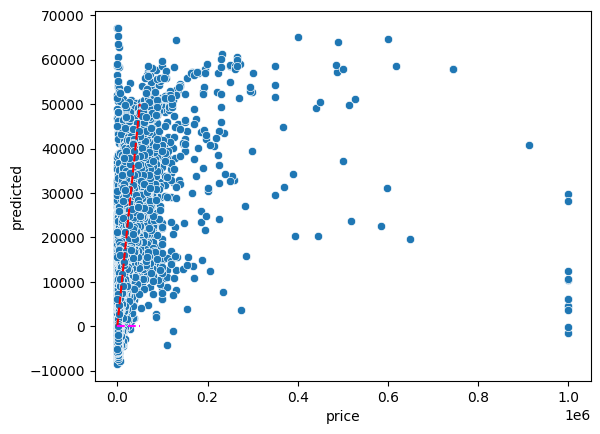

In [13]:
sns.scatterplot(df_precios, x="price", y="predicted")
plt.plot([0,50000], [0,50000], color="red", ls = '--')
plt.plot([0,50000], [0,0], color="magenta", ls = '--')

Hay datos enegativos lo cual es señal de algún tipo de error. Por otro lado, a la vista de la gráfica, la regresión lineal no es el modelo más adecuado para predecir sobre estos datos.

In [14]:
df_precios.describe().T

,count,mean,std,min,25%,50%,75%,max
predicted,260069.0,5915.77796,6525.533765,-8478.809812,1260.096897,4951.135109,9361.894347,67147.688557
price,260069.0,5915.77796,12081.030101,1.000000,1250.000000,3000.000000,7300.000000,999999.000000


In [15]:
df.to_csv("datos/regresion.csv")